# Task 1: Bulk RNA-seq data analysis
## Quality control (QC), mapping and functional analysis


Comparative & Regulatory Genomics - [I0U29a] | Task 1 - Bulk RNA-seq data analysis | Antoine Ruzette <b> r0829308 </b> | 19.12.2021


## Introduction and context

In this report, the quality control, mapping and function analyis of publicly available bulk RNA-seq data was performed. The data used were gathered through the following research project: 

<i> da Silva-Diz V, Cao B, Lancho O, Chiles E, Alasadi A, Aleksandrova M, Luo S, Singh A, Tao H, Augeri D, Minuzzo S, Indraccolo S, Khiabanian H, Su X, Jin S, Herranz D. A novel and highly effective mitochondrial uncoupling drug in T-cell leukemia. Blood. 2021 Oct 14;138(15):1317-1330. doi: 10.1182/blood.2020008955. PMID: 33876224; PMCID: PMC8525334. </i>

Before diving into the data analysis, a brief introduction about the aforementioned research project is given. T-cell acute lymphoblastic leukemia (T-ALL) is an aggressive hematologic malignancy. <i> da Silva-Diz et al </i>  tested the antileukemic effects of MB1-47, a mitochondrial uncoupling compound. MB1-47 treatment in T-ALL cells robustly inhibited cell proliferation via both cytostatic and cytotoxic effects as a result of compromised mitochondrial energy and macromolecule depletion, which severely impair nucleotide biosynthesis. Mechanistically, acute treatment with MB1-47 in primary leukemias promoted adenosine monophosphate–activated serine/threonine protein kinase (AMPK) activation and downregulation of mammalian target of rapamycin (mTOR) signaling, stalling anabolic pathways that support leukemic cell survival. The control i.e. non MB1-47-treated cells were treated with DMSO. 

Through the research project, six data sets were published, namely three replicates for control cells and for MB1-47 treated  cells: 

- Control 1: SRR13516821	
- Control 2: SRR13516822	
- Control 3: SRR13516823

- MB1_1: SRR13516818
- MB1_2: SRR13516819
- MB1_3: SRR13516820	

For the simplicity of this report, only four of the six data sets were used. The four were randomly chosen. The odds chose to continue with: 

- Control 1: SRR13516821	
- Control 3: SRR13516823
- MB1_1: SRR13516818
- MB1_2: SRR13516819

All mentioned data can be found at the following SRA webpage: [SRP303033](https://www.ncbi.nlm.nih.gov/sra?term=SRP303033). 

<i>Control genes:</i>

We will focus our analysis on the investigation of the effect of MB1-47 on the mTOR/AMPK signaling cascade by studying the associated RNA-seq data of genes having a direct or indirect impact on the mTORc1 complex and AMPK. 
Therefore, we will use the six following genes as control ones throughout the analysis: 

- RNF152
- FNIP1
- SESN2
- SESN3
- RRAGD

- mTOR (gene encoding for the proteins that constitute the mTOR signalling complex)

RNF152, SESN2 and SESN3 are genes encoding for three well-known negative regulators of the mTOR signalling complex 1 (mTORC1). 
FNIP1 and RRADG are both genes encoding components of the Lysosomal Folliculin Complex (LFC), which positively regulates AMPK, thus have an indirect impact on mTORC1. 

<i>Hypotheses:</i> 

Based on literature (<i>da Silva-Diz V et al</i>), we first expect increased levels in RNF152, SESN2, and SESN3 mRNAs, which encode for 3 well-known negative regulators of mTORcomplex 1 signaling. We also expect that upregulated genes are involved in pathways related to endoplasmic reticulum stress,cell-cycle arrest, and activation of autophagy/cell catabolism while the functional annotation of downregulated genes by MB1-47 exposure identified a drastic repression of pathways related with OXPHOS, nucleotide metabolism, and mRNA stability, together with a concomitant downmodulation in DNA replica-tion and cell-cycle progression pathways.


The following picture (found in the supplementary materials of <i>da Silva-Diz V et al</i> indicates some genes that were upregulated or downregulated when exposed to a MB1-47 treatment compared to control expression levels: 
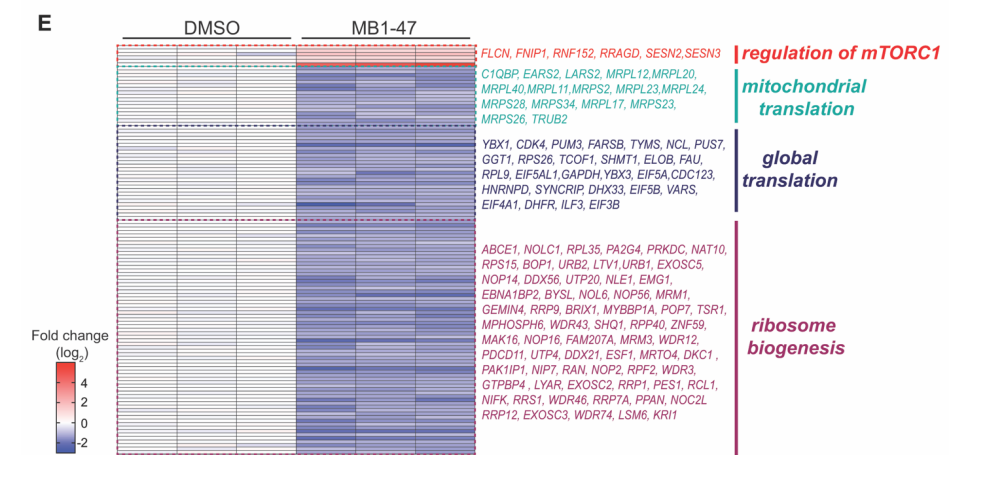

From a literature study (i.e. [GeneCards](https://www.genecards.org/cgi-bin/carddisp.pl?gene=RNF152&keywords=RNF152)) of the AMPK/mTOR cascade, a cascade adapted for the control genes was created to help the reader grasps the global context of the study. 

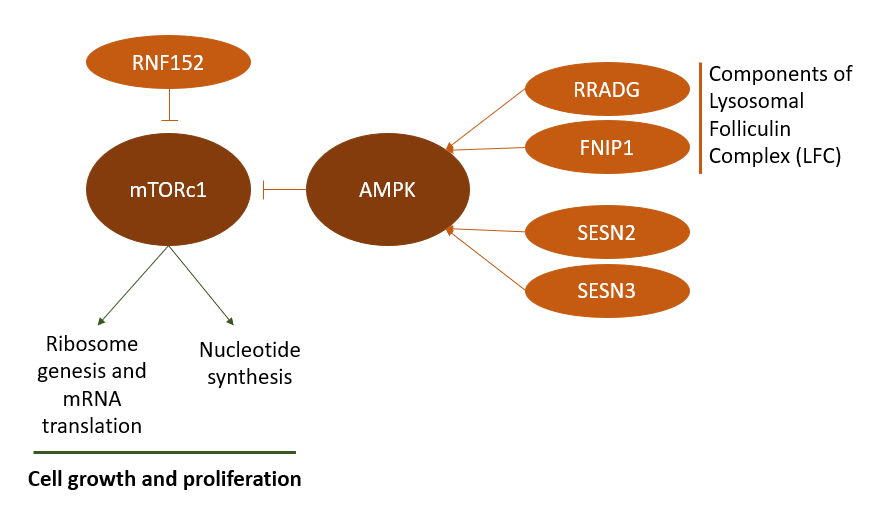

## Notebook 1 - Quality Control (QC) and Mapping

In this section are presented the results of the `Task1_QualityControl&Mapping` notebook. For full details about code, please refer to the latter. 

### Quality Control

As explained during <i> Regulatory Genomics </i> classes, the quality control of data is done via FASTQC. Depending on the outcome of the checks, we can decide wether or not we continue with the present data sets. We focus on three quality metrics, namely per base sequence quality, sequences duplication levels and overrepresented sequences. 

- The per base sequence quality check plots the distribution of quality scores per bp position
- The sequences duplication levels check indicates how the reads are unique in the library
- The overrepresented sequences metric checks for reads that are represented for more than 0.1% in the whole library

The following figures were retrieved from the MB1 first replicate ([SRR13516818](https://www.ncbi.nlm.nih.gov/sra/SRR13516818/)) FASTQC output (zip file). 

##### Per base sequence

Overall, the per base sequence quality of the four data sets presented good results and passed the first check. 

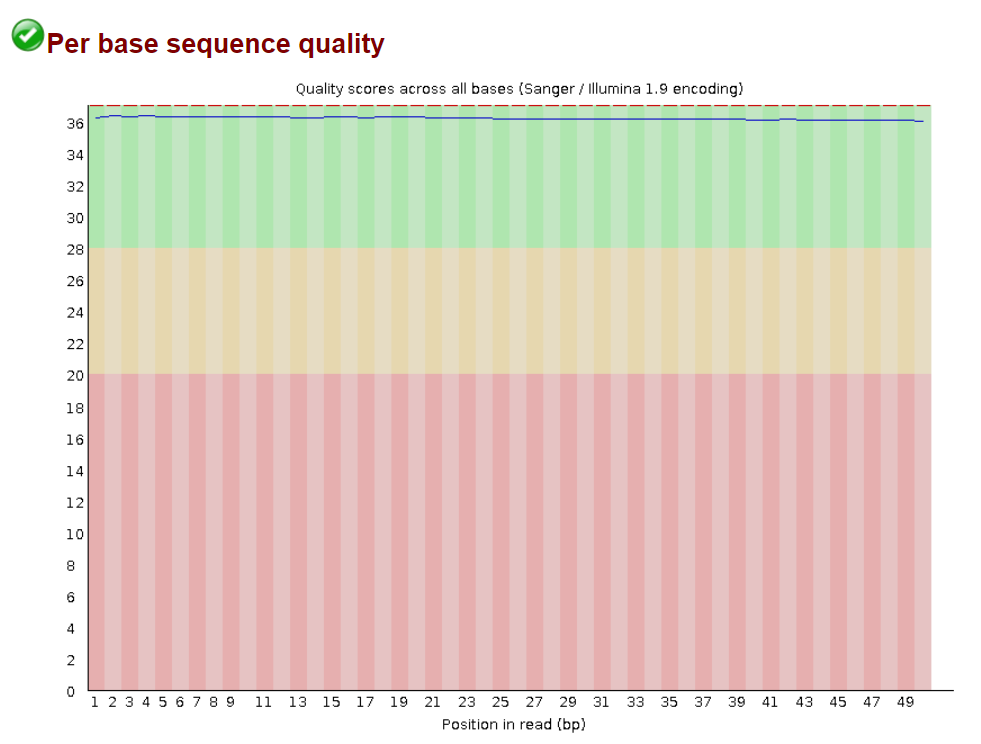

##### Sequence duplication levels

The sequence duplication levels were reported as bad for every data sets. However, for RNA-seq data, it is normal to have highly and lowly abundant transcripts as they are present in more than one copy (compared to DNA-seq data).

As explained by the [Research Technology Support Facility of the Michigan State University](https://rtsf.natsci.msu.edu/genomics/tech-notes/fastqc-tutorial-and-faq/#:~:text=Sequence%20Duplication%20Levels%20Percentage%20of%20reads%20of%20a,The%20red%20line%20is%20more%20difficult%20to%20interpret.%29), <i> "...when sequencing RNA there will be some very highly abundant transcripts and some lowly abundant. It is expected that duplicate reads will be observed for high abundance transcripts. The RNA-Seq data below was flagged as Failed by FastQC even though the duplication is expected in this case." </i>

Thus, even if all library were reported as a bad in term of sequence duplication levels, the second check did not discard any data set. 


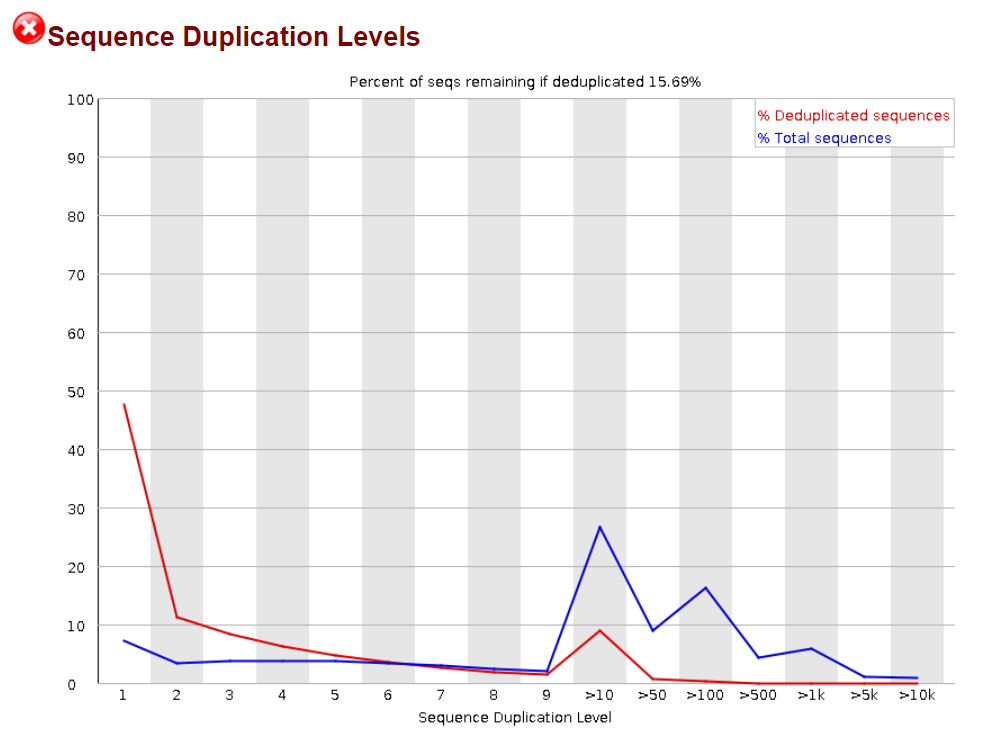

##### Overrepresented sequences

Lastly, we look at sequences that might be overrepresented among the library. For the MB1-1 replicate, a warning arises from the FASTQC analysis. It indicates that a certain sequence, namely <i> GAAGAGATATGAGGAAATTGTTAAGGAAGTCAGCACTTACATTAAGAAAA </i>, is overrepresented as it accounts for more than 0.1% of the whole library. Fortunately, no corresponding matches to a database of contaminants were found. 
Finding that a single sequence is very overrepresented in the set either means that it is highly biologically significant, or indicates that the library is contaminated, or not as diverse as you expected.

- SRR13516818 (MB1_1): 1 Warnings
    - GAAGAGATATGAGGAAATTGTTAAGGAAGTCAGCACTTACATTAAGAAAA | 0.11% | No hit
    
    
- SRR13516819 (MB1_2): 0 Warnings


- SRR13516821 (Control 1): 4 Warnings
    - TATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACC | 0.23% | No hit 
    - CATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACCT | 0.20% | No hit	
    - TAACGTGTCAGGGCTGAGTGTTCTGGGATTTCTCTAGAGGCTGGCAAGAA | 0.15% | No hit
    - GAAGAGATATGAGGAAATTGTTAAGGAAGTCAGCACTTACATTAAGAAAA | 0.12% | No hit
    
    
- SRR13516823 (Control 3): 4 Warnings
    - TATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACCT | 0.19% | No hit
    - CATGGCCTTCCGTGTCCCCACTGCCAACGTGTCAGTGGTGGACCTGACCT | 0.16% | No hit
    - TAACGTGTCAGGGCTGAGTGTTCTGGGATTTCTCTAGAGGCTGGCAAGAA | 0.14% | No hit
    - GAAGAGATATGAGGAAATTGTTAAGGAAGTCAGCACTTACATTAAGAAAA | 0.10% | No hit
    
    
As FASTQC only reported warnings (and not failures), we continue with these four data sets while keeping those warnings in mind. 

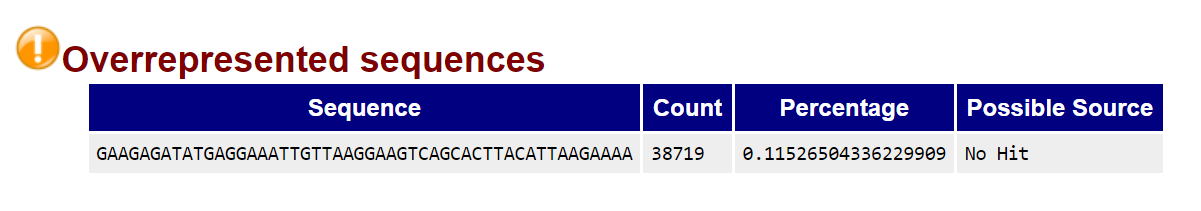

### Mapping the reads to the human genome

Mapping to the human genome hg19 was performed using the STAR algorithm. It uses .fastq file as inputs and .sam files as outputs containing the mapping of all sequenced reads. The following picture depicts the format of the SAM file and the information returned such as position on the human genome and the quality of the mapping of the reads. 

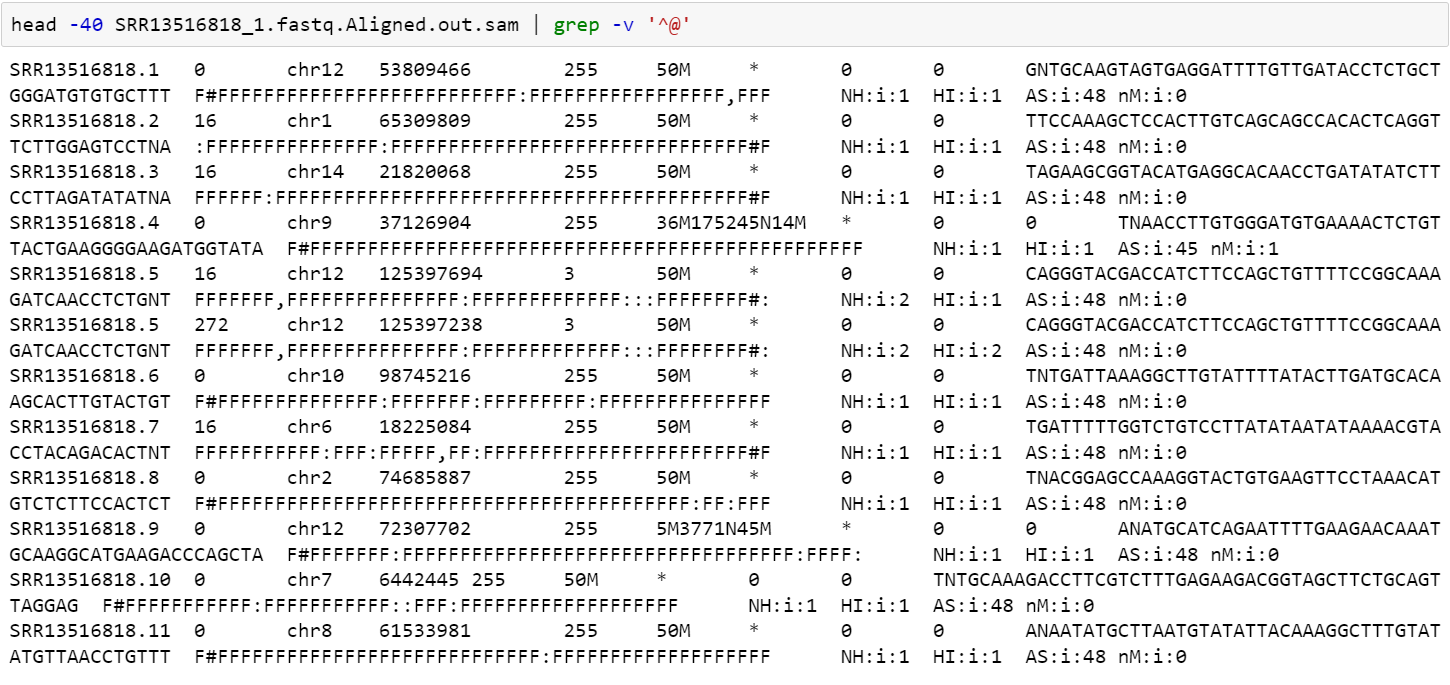

The SAM file of each library is then sorted and compressed into a .bam file using `samtools`. As a matter of fact, the SAM file for SRR13516818 (MB1_1) weighted approx. 8GB while the BAM file for the same library weighted only 500MB. From these BAM files, we generated indexes using `samtools index` function so that we can visualize the alignment to the reference genome in IGV. 

We head to IGV to visualize the BAM files (the index BAI files are also needed). The following figure shows the gene expression levels of RNF152, SESN2 and SESN3 from two library, Control 1 (SRR13516821) and MB1_1 (SRR13516818). By looking at the density of the mapped reads, RNF152 and SESN3 show clear evidence of upregulation when its cell is subject to a MB1 treatment. The same observation is harder to conclude when looking at SESN2 but still shows little evidence of upregulation when subject to MB1 compared to a control cell. 

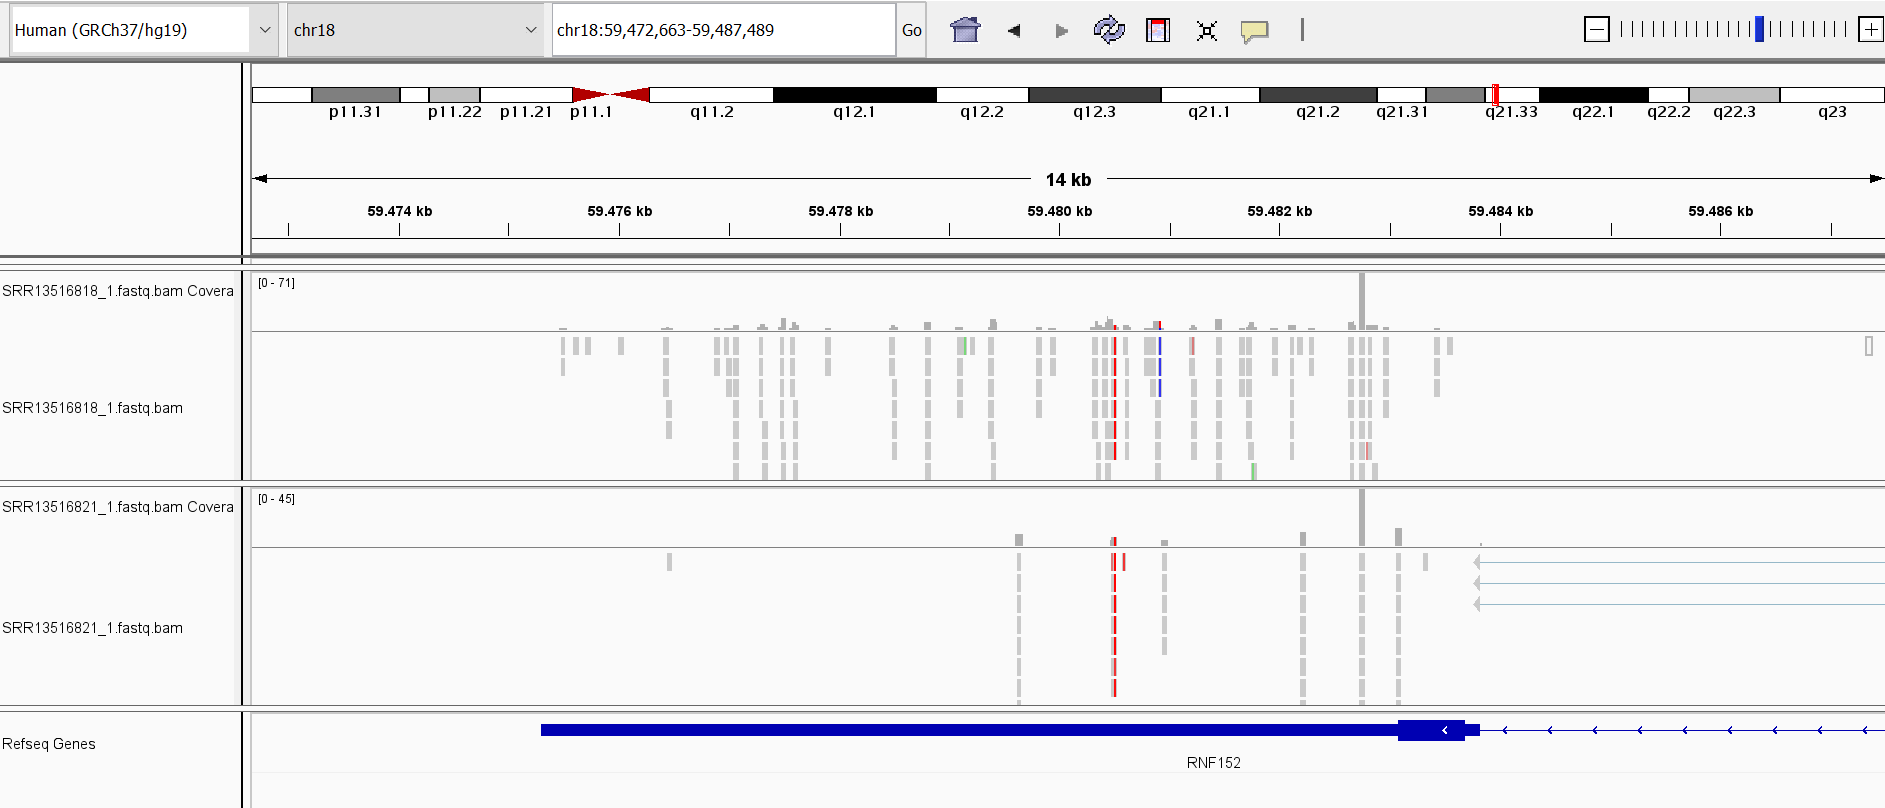

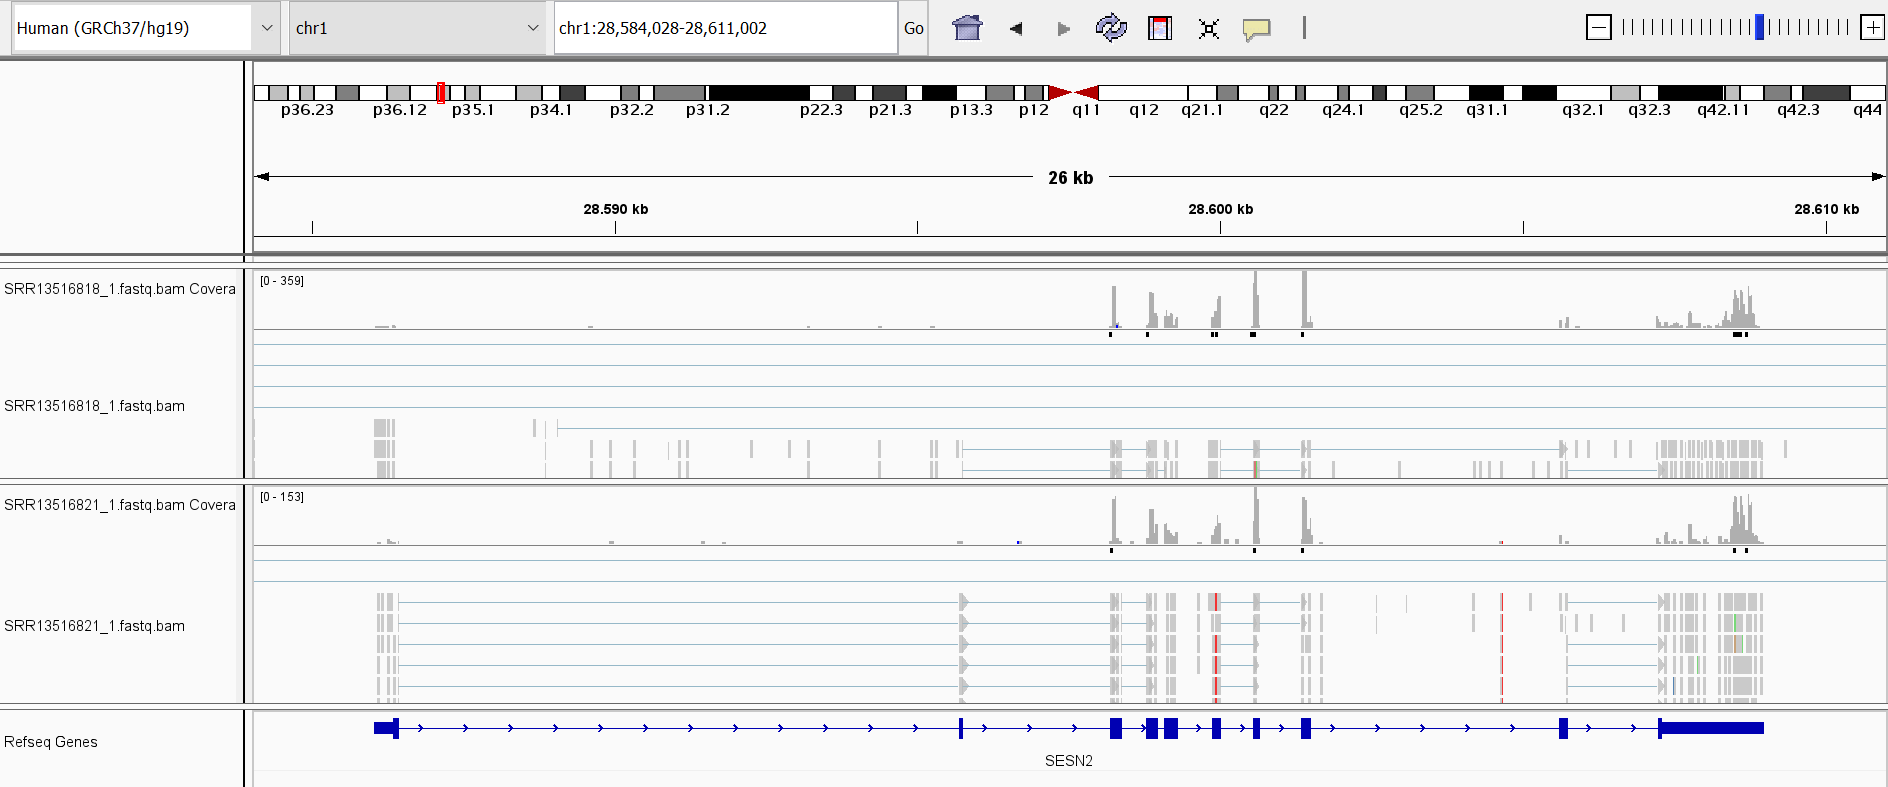

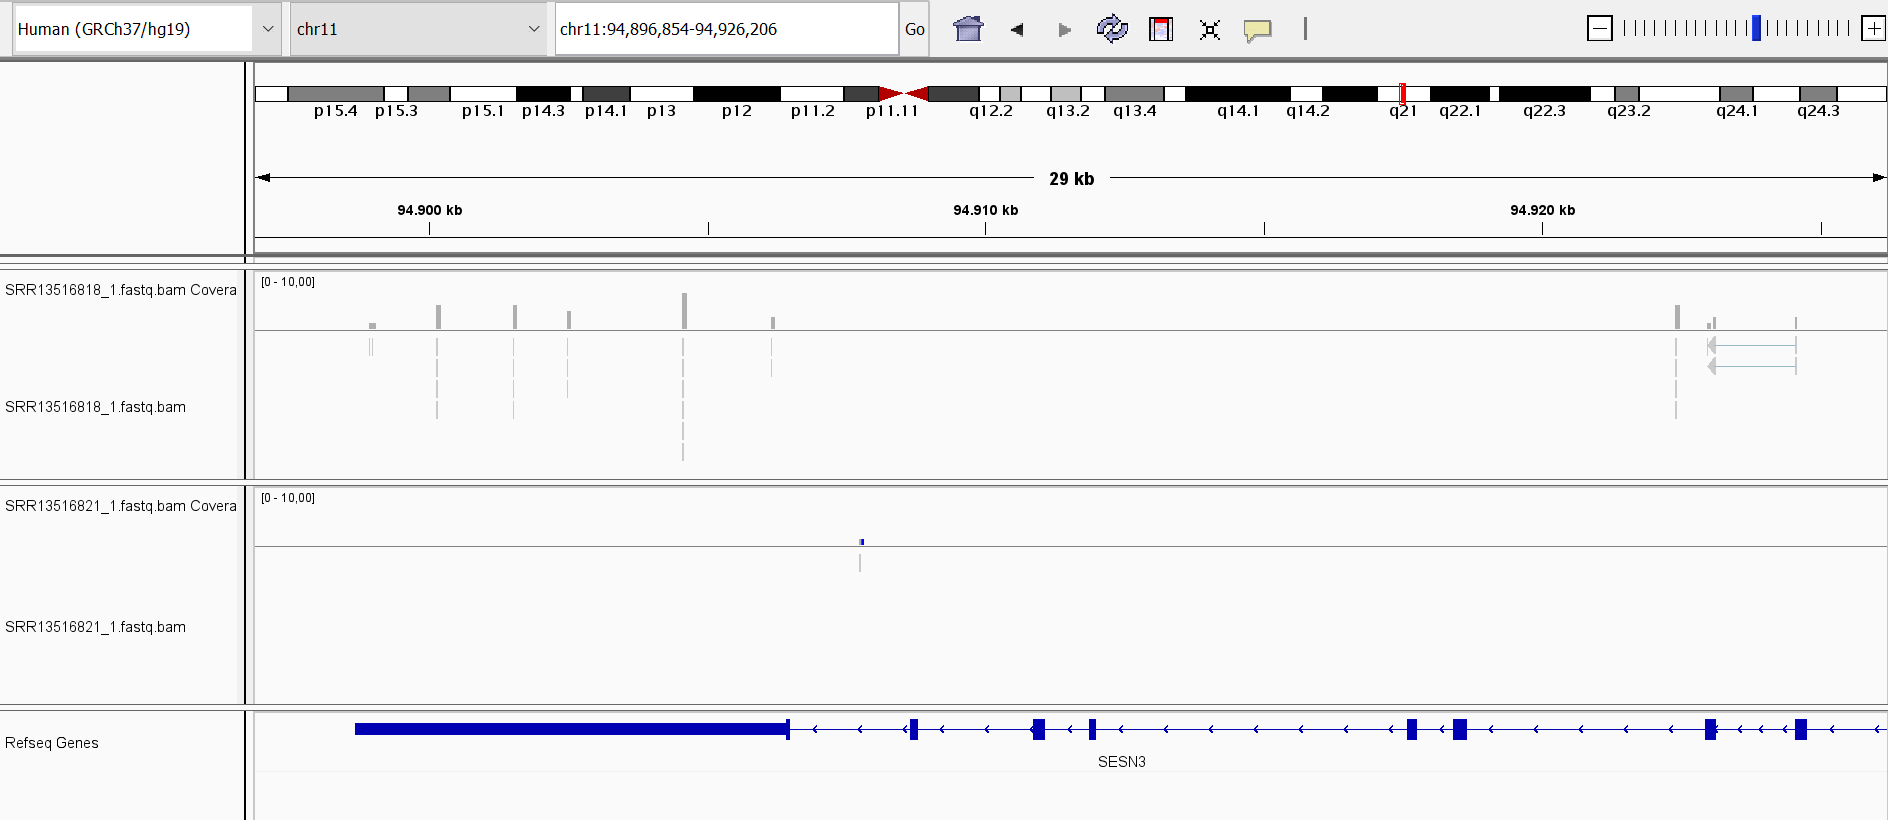

Finally, we use `samtools idxstats` to check the number of reads that map to each human chromosome and `samtools flagstat` to check the distribution of mapping flags (available in the BAM files).

See [here](http://www.htslib.org/doc/samtools.html) for a more extensive explanation of the `samtools flagstat` output. 


Results of `samtools flagstat` are displayed on the following figure. All reads passed its Quality Control and were mapped. 

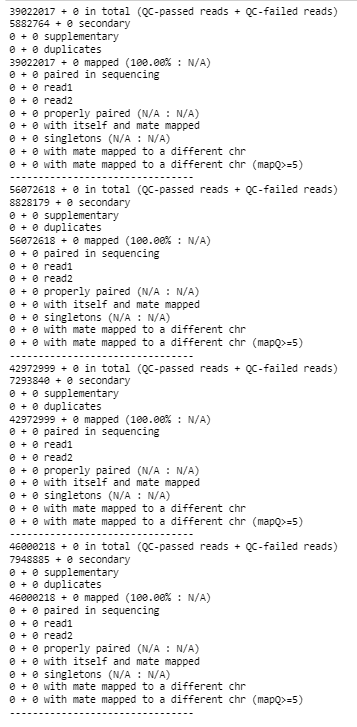

### Reads to gene counts

Once we have our reads aligned to the human genome hg19, the next step is to count how many reads have been mapped to each gene. This is done by running the python script `featureCounts` on each BAM file. 

The results are the percentage of reads that have been assigned for each BAM file, and a .counts file for each of them. This gives us the following figure, which shows sufficiently high percentage (approx. 65%) of assigned reads for each sample to be continued with:

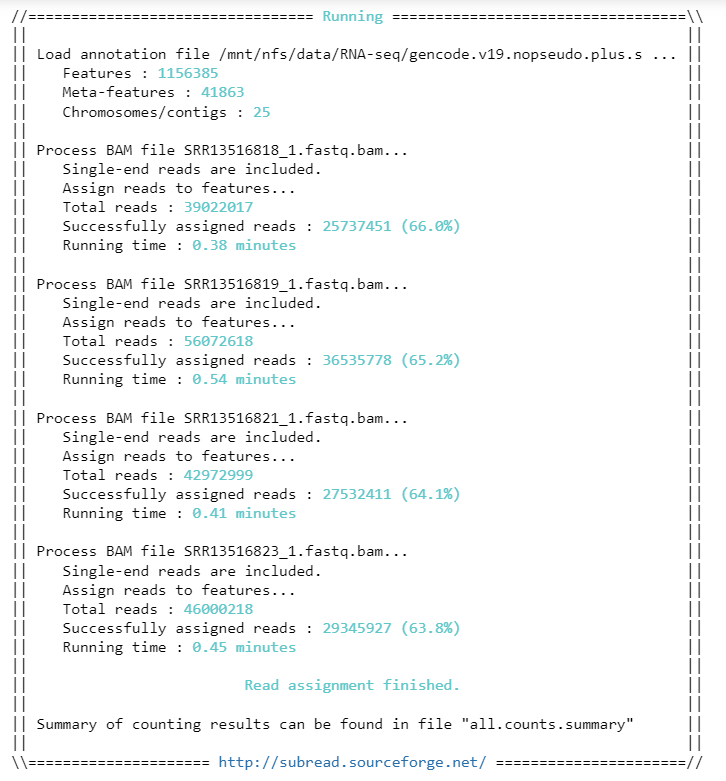

From the previous .counts file, we can look at the expression levels of the four genes of interest. Evidence for the upregulation of SESN2 are undiable. However, note that the expression levels are still raw count and will be futher normalized in order to be comparable despite different sizes of library. 

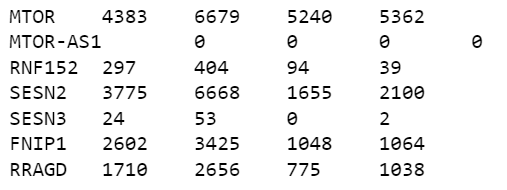

Finally, we generated the `all.genedata.tsv` and `all.gene.counts` files. The two will be used for downstream analysis. 

## Notebook 2 - DeSeq Analysis

In this section are presented the main results of the second notebook, named `Notebook2_DESeq_AntoineRuzette`. Please refer to the latter to explore in further details the code and the results of the main steps of the DESeq Analyis. 

Before being able to draw any solid conclusion, we need to normalize the data to account for various bias such as the library size. It is performed through a R package called `DESeq2`. According to the package documentation, DESeq estimates variance-mean dependence in count data from high-throughput sequencing assays and tests for differential expression based on a model using the negative binomial distribution. We are particularrly interested in the second application of `DESeq`. 

Let's start with an overview of the distribution of raw counts per library: 

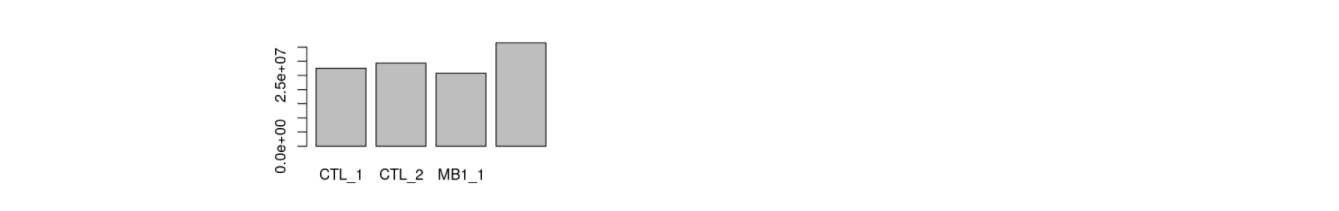

We observe that the largest library is MB1_2 while the smallest is MB1_1. The two control families have a comparable size. 

After creating a DESeq object, we apply to that same object the differential expression analysis via the `DESeq` function. The function applies all steps needed to perform differential expression analysis. It normalizes the counts with a size factor that is proportional to the size of their library.  

Obviously, the size factors follow the same behavior as the distribution of raw counts per library: 

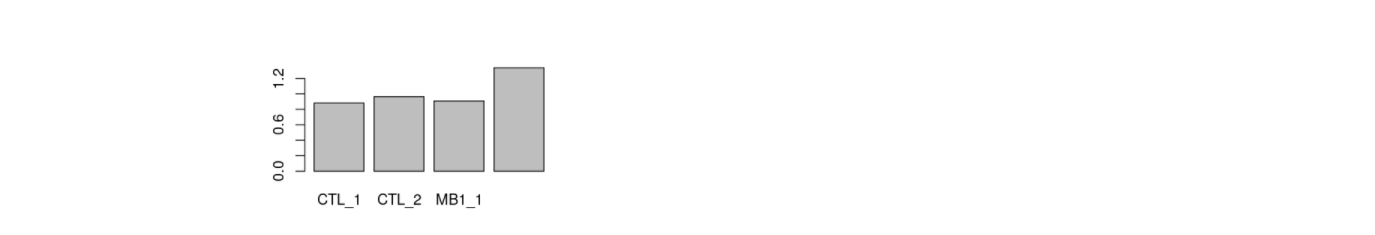

To assess that something did happen during the experiment, we can look at two figures, that is a scatterplot of sample vs sample and the frequencies of p-values. In our case, the former indicates that there exists a larger spread of the data between CTL_1 and MB1_1 than between CTL_1 and CTL_2, which is a good news since the two conditions do not nicely correlate while it does between similar condition. The latter shows an enrichment around low p-values, meaning that a load of genes are considered as significant differentially expressed genes. 

From these two, it seems that the experiment did work and that the genetic expression behaviors between the control cells and the treated cells are different. 

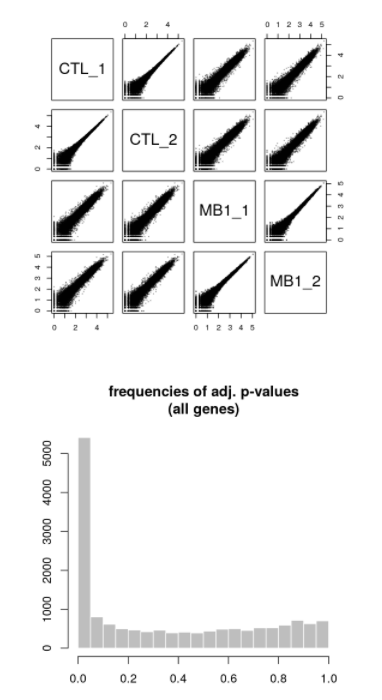

Furthermore, we can compute a MA plot, which allows us to visualize how much the expressions of genes have been impacted by the treatment (MB1-47). The red dots represent the genes that, among those which are up- or down- regulated, are also statistically significant (p-value < 0.05).

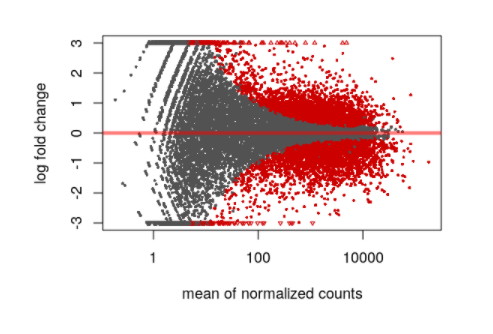

Graphically, we see that many genes are considered as differentially expressed ones. Indeed, 5.415 genes are differentially expressed among the 41.863 genes analysed. 

Finally, let's have a look at the normalized plots counts of the genes involved in the regulation of mTORc1. The five genes encoding for negative regulators (direct or indirect) are upregulated when subject to a MB1 treatment while it is the opposite for the case of the MTOR gene. These observations are in line with the initial hypothesis (see `Introduction and Context` section). 
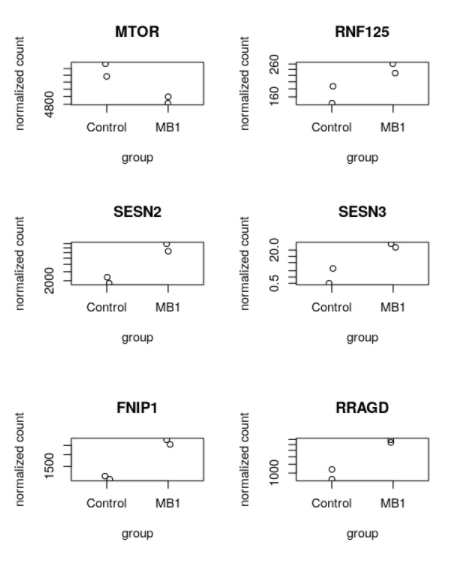


We saved on the server a `deseq.results.tvs` file, which will be used in the third and last part of the report, the functional analysis.

## Notebook 3 - Functional Analysis

The main steps and results of the third notebook, named `Notebook3_FunctionAnalysis_AntoineRuzette`, are presented here. To see the code and the results in details, please consult the latter.

In this part of the report, we want to find out the possible pathways that are enriched in the differentially expressed genes.

The first thing that we do is to generate two .txt files, named up-logFC1-p05.txt and down-logFC1-p05.txt, which contain genes with a log2 fold change > |-1;1| and a significant p-value < 0.05. This classification is done following an arbitrary threshold. By looking at these files, we obtain the following results:

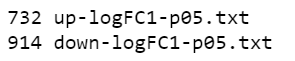

#### HumanMine

We have a decent amount of genes for each class of expression level to go on with the functional analysis. We can now start to look for pathway enrichments using our genes sets. For that purpose, we will use the Humanmine.org tool.
Note that 732 genes were considered as upregulated while 914 as downregulated. These two amounts are higher than the ones that were found in the analysis of the related paper. 

From the related paper: 
<i>"...these analyses revealed that MB1-47 results in 635 significantly downregulatedand 414 significantly upregulated genes (fold change.2 and adjustedP, .0001 cutoffs; supplemental Table 1)."</i> 

Due to the cutoff of log2FC > 1,  RRAGD is not considered as upregulated with its log2FC value of 0.98 and therefore is not in the list. 
Note that the cutoff used for the adjusted p-values we used is not the same as in the paper, namely 0.05 versus 0.0001 in the paper. If we were to use a cutoff of 0.0001, then 400 genes would be upregulated and 679 would be downregulated. This is similar to the paper, which indicates that the four libraries correctly approximate the six libraries generated by the experiment. 

Out of the 732 upregulated genes, 627 were found on the HumanMine, with only one gene being returned as ambiguous. Out of the 914 downregulated genes, 860 matched a gene in Humanmine. As the genes we focus on are all upregulated, we will focus on this list in Humanmine.

We learn interesting biological insights from the GO Enrichment tool from Humanmine. Indeed, We observe that many enriched GO terms are associated to catabolic, apoptotic process or unfolded proteins. It means that among the upregulated genes are a significant amount of genes that are known to be involved in the three latter processes. Thus, it indicates that the MB1 treatment seems to promote the breaking down of complex molecules and the programmed death of the cell. Furthermore, we see that some GO terms are associated with unfolded or topologically incorrect proteins and this is often linked with the endoplasmic reticulum which is a hotspot of protein synthesis. One can say that the MB1 treatment causes a protein structure disorder in the endoplasmic reticulum. However, that would be an ative conclusion for the moment and would require a deeper analysis.

Instead of looking at a screenshot from the Humanmine website, we can download a file containing the enriched GO terms and look at the GO terms containing the word <i> catabolic</i>, <i>apoptotic</i>, <i>unfolded</i> or <i>incorrect</i> to count the occurence of each word. in total, 59 GO terms were retained by Humanmine. 

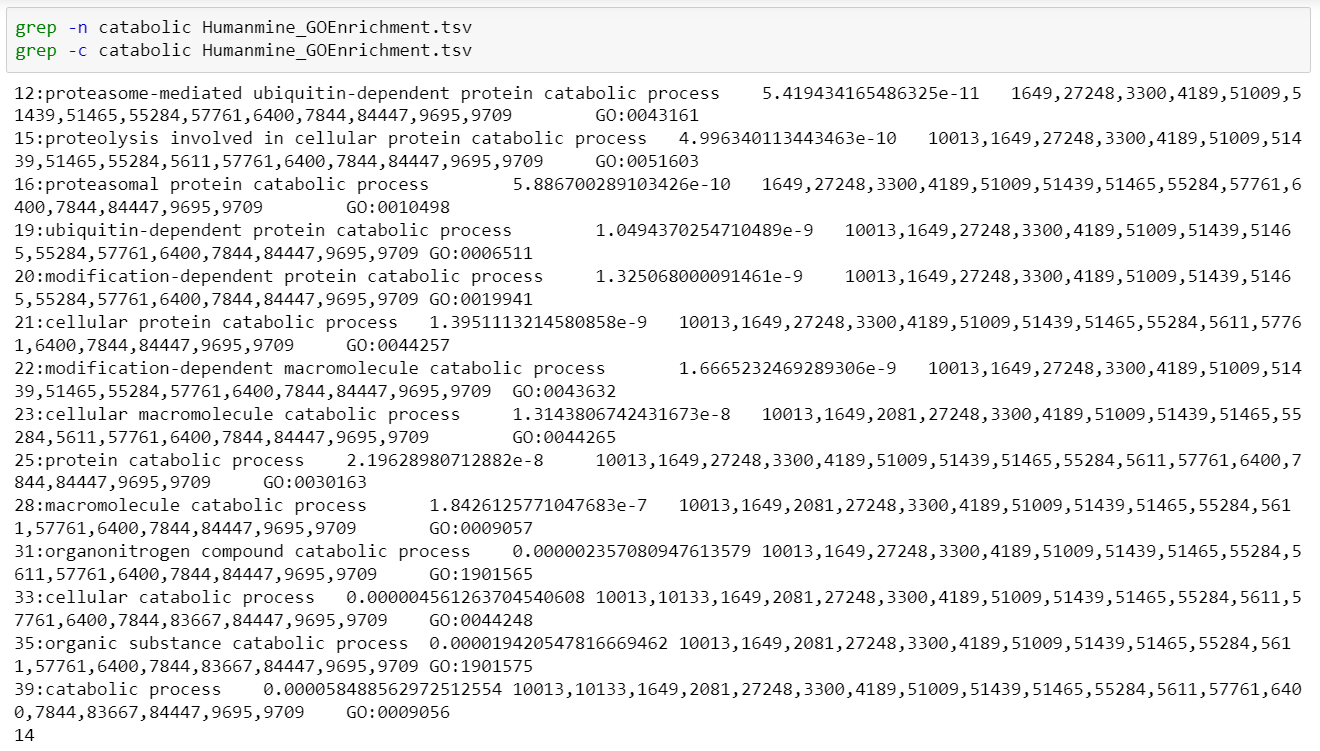

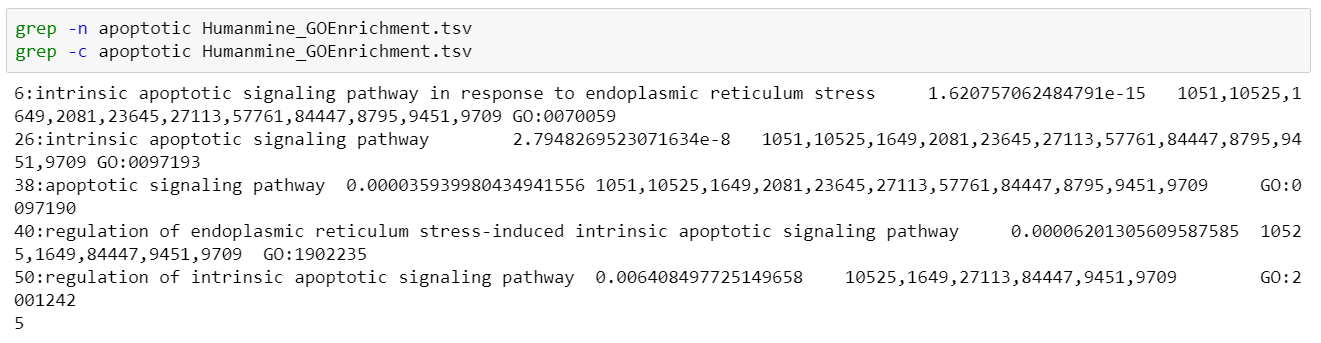

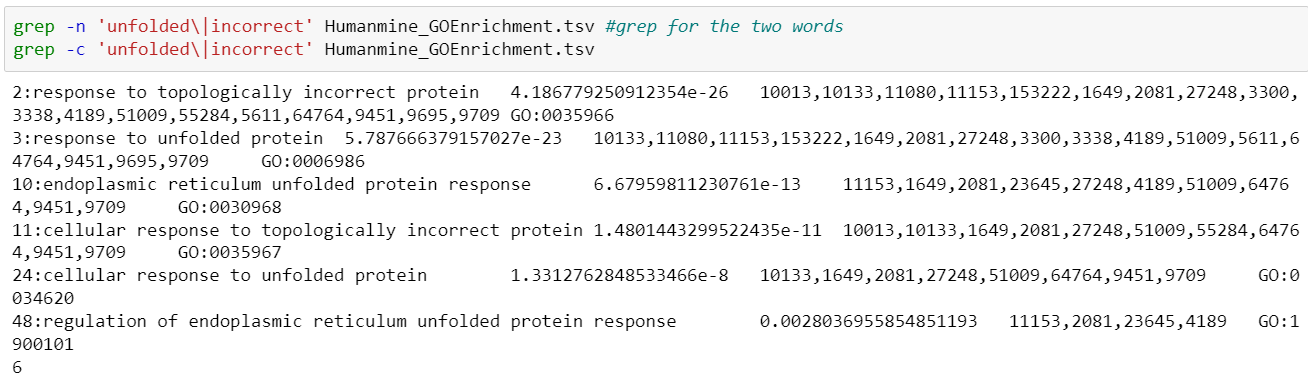

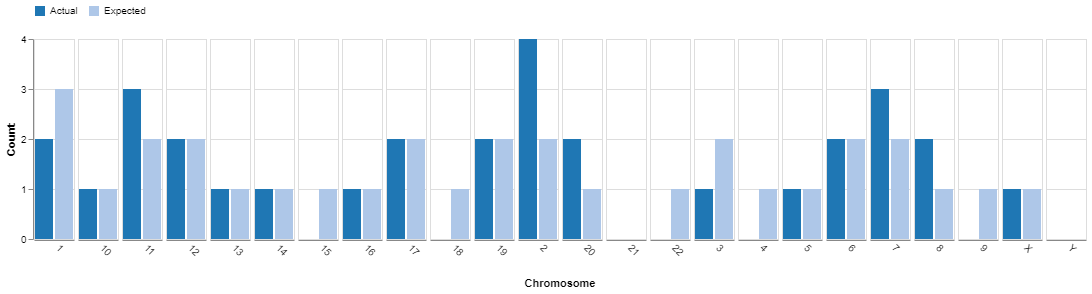

#### gProfiler

To confirm the preliminary GO enrichment term analysis, we head to gProfiler that offers a nice graphical visualization tool. 

- 1 > 2: GO terms linked to apoptotic processes
- 3 > 6: GO terms linked to catabolic processes
- 7 > 12: GO terms linked to a cellular response to an unfolded or topologically incorrect protein

Interestingly, we observe that the most significant GO terms are the ones associated to unfolded or topologically incorrect proteins. It puts the hypothesis of a protein structure disorder caused by MB1 in the spotlight.  

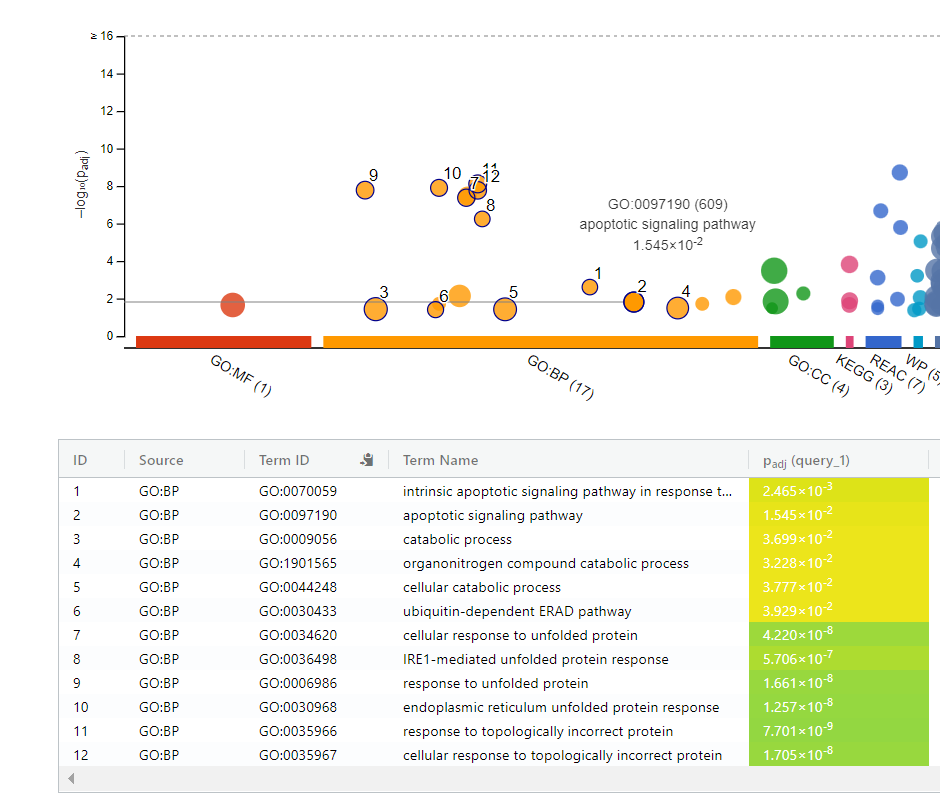

#### GSEA

Then, we will use the Gene Set Enrichment Analysis (GSEA). Now we calculate the enrichment score for the real data, then run enrichments of randomized rankings, and see if, and how many, enrichments get higher score than for the enrichment of the real data.

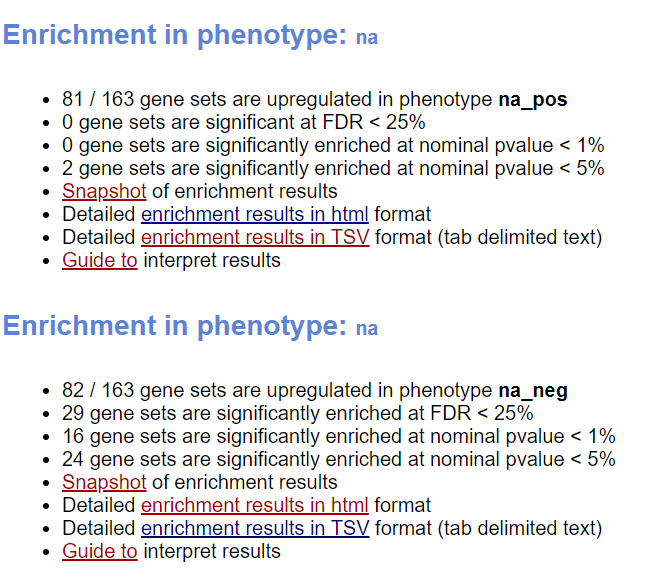

For the top part, <i> na_pos </i> phenotype: 

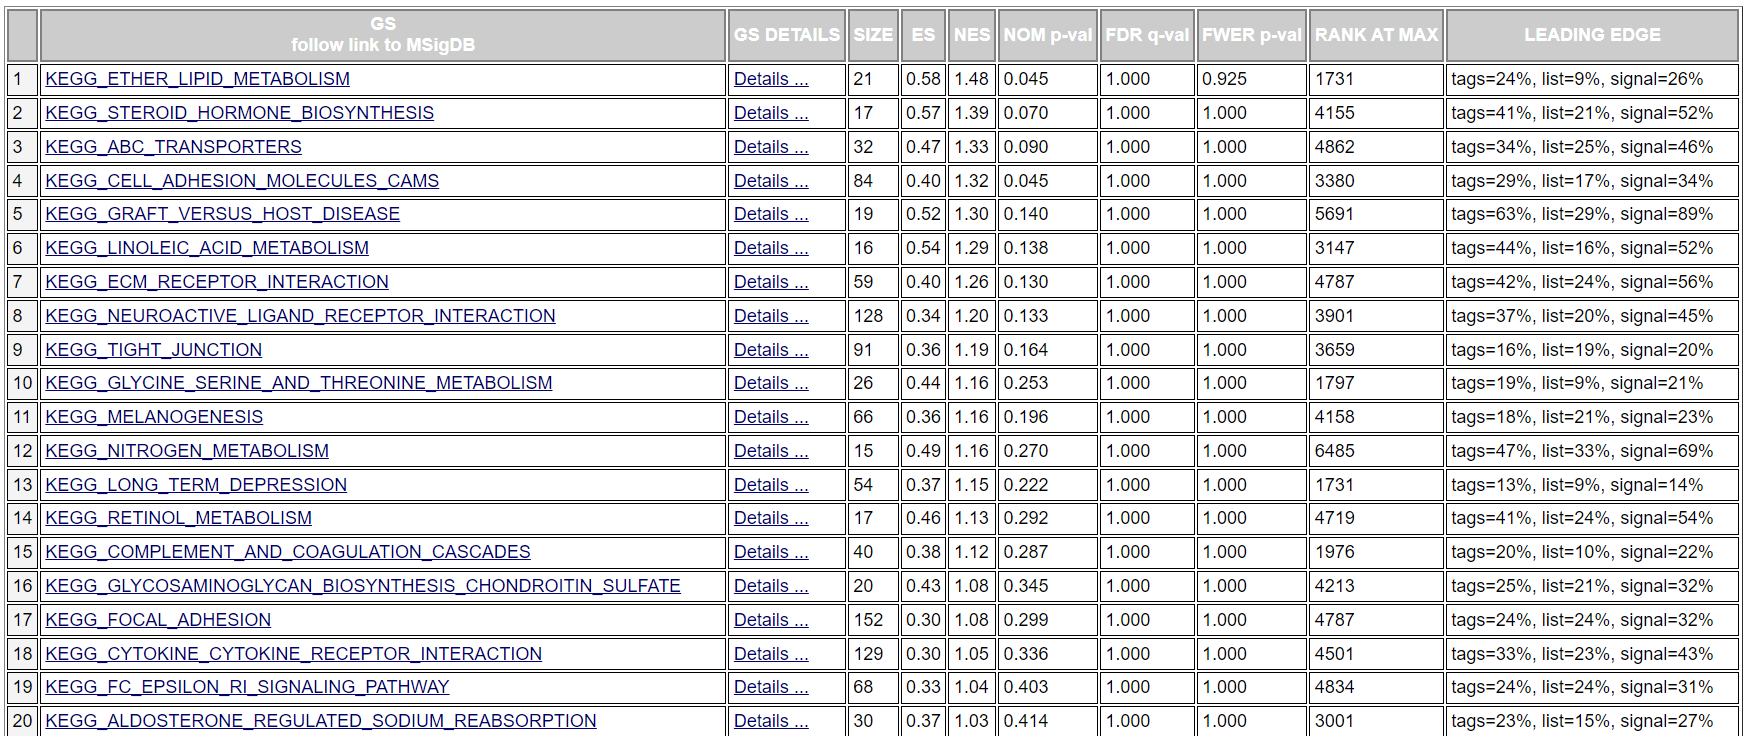

For the bottom part, <i> na_neg </i> phenotype: 

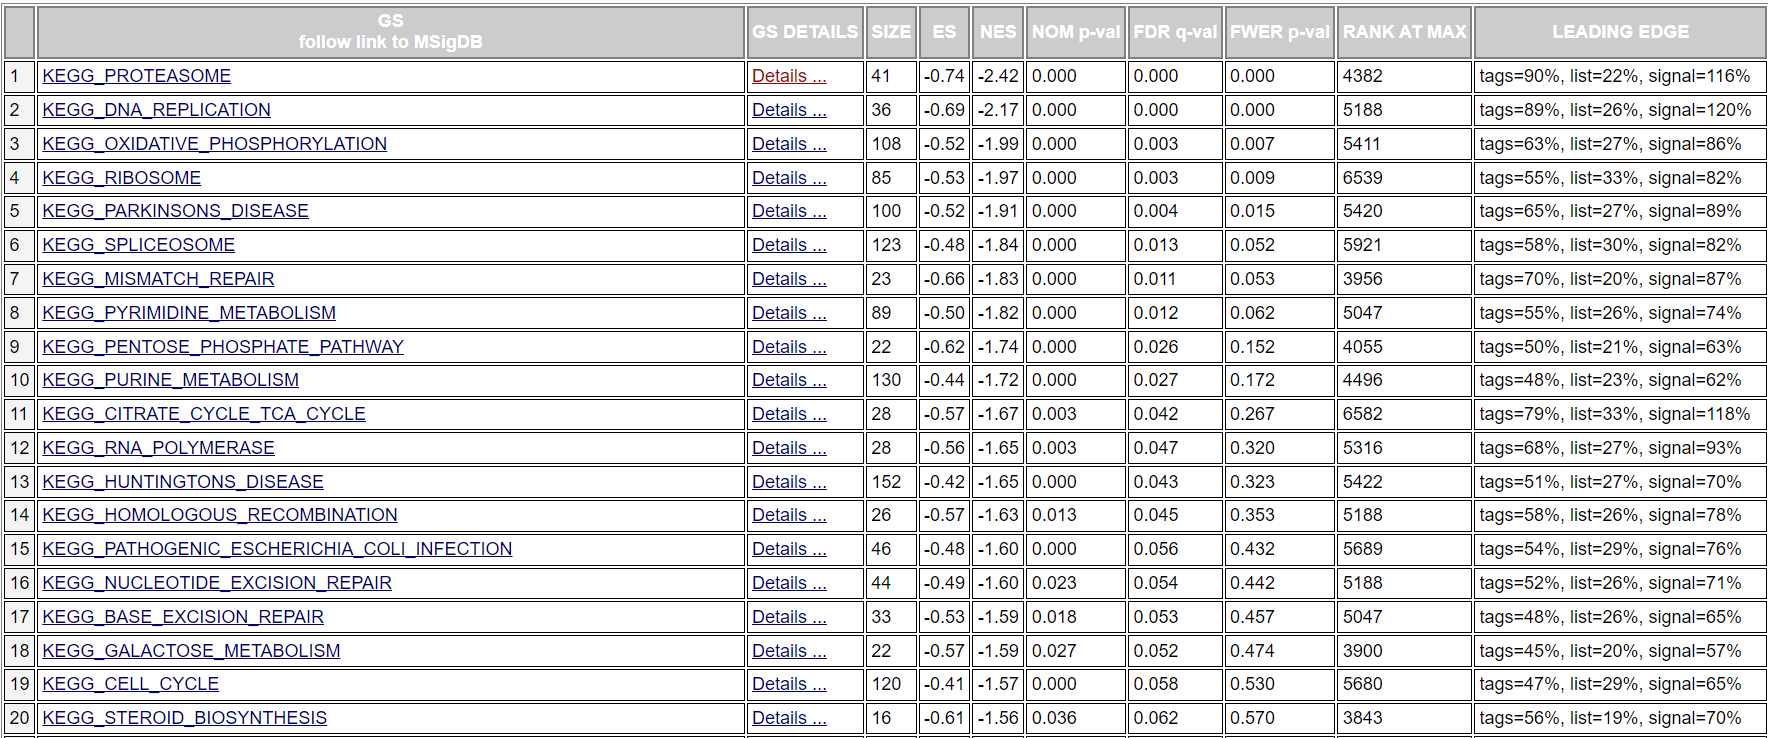

The below figure shows a ranked list of genes, in red upregulated, in blue downregulated. We see that the black bars, which represent gene sets, are not uniformaly distributed, but concentrated at the bottom of the curve (to the right), in the downregulated site. Finally on this graph, the position (here at the lowest point of the cure) with the best enrichment score is the leading edge.



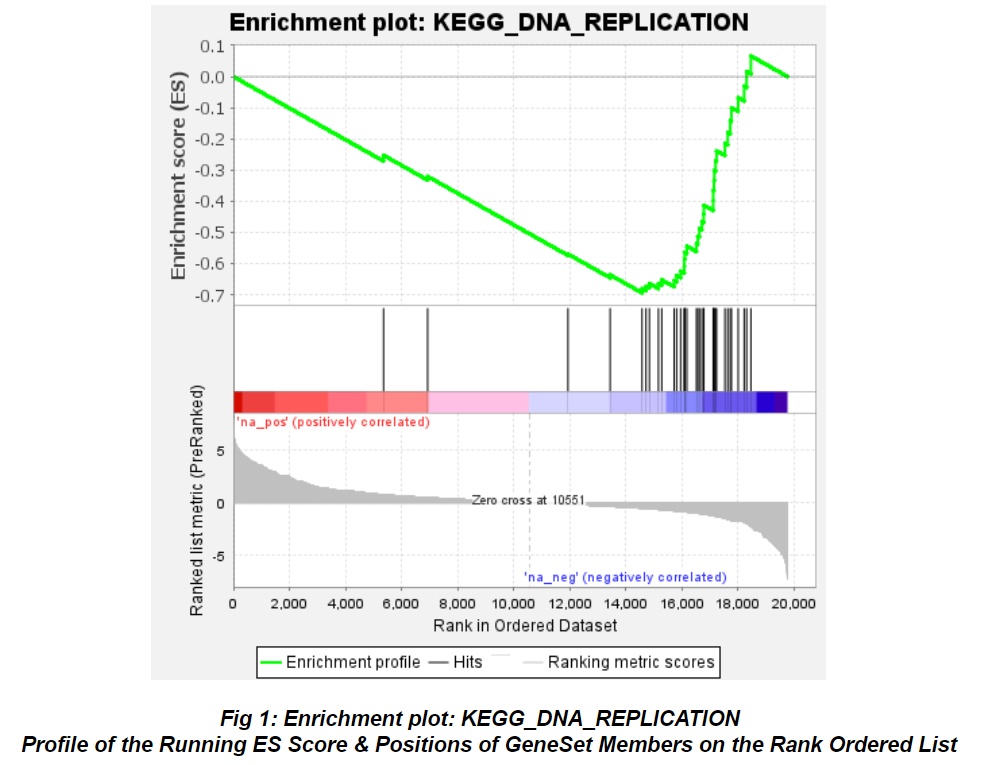

In the bottom part (na_neg), DNA replication pathways are significantly enriched (leading edge 5188). Its distribution of genes is displaced to the right, meaning the the DNA replication pathways are downregulated. 
Apart from that from the GSEA, not much can be concluded.

#### Cytoscape i.e. iRegulon

We will finally be looking for upstream regulators, using motif enrichment analysis, which allows us to find co-expressed and co-regulated genes. Here we will predict binding sites of Transcription Factors, using Cytoscape, and more precisely the module iRegulon.

First, we import on the tool our upregulated gene list, generated previously. We obtain the following grid, with each rectangle representing a gene. Four of our upregulated control genes are represented in yellow, FNIP1, RNF152, SESN2 and SESN3:
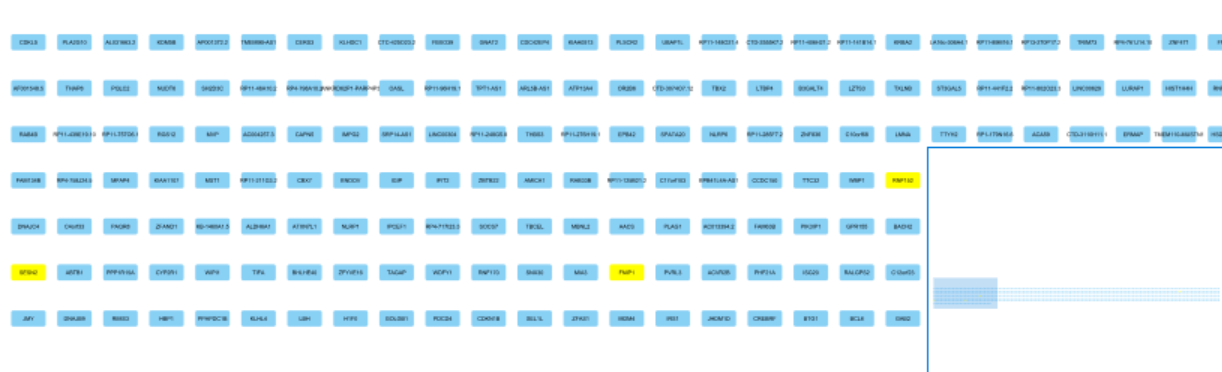

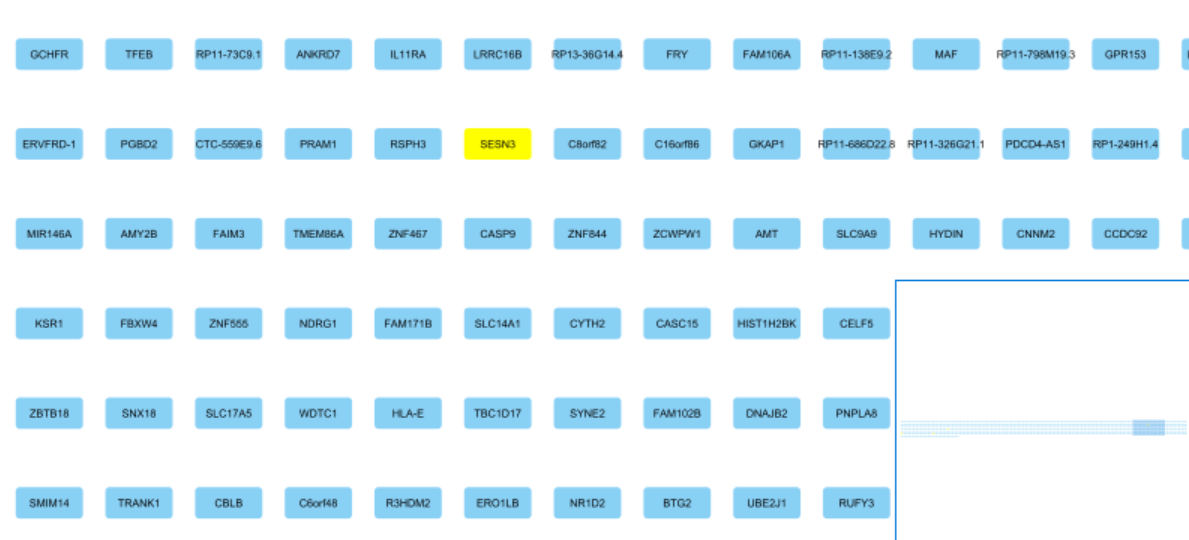

Then, we use a motif discovery analysis using iRegulon (after installing it to Cytoscape). We get the below table as a result, which lists transcription factor motifs, ranked by an normalised enrichment score (NES).


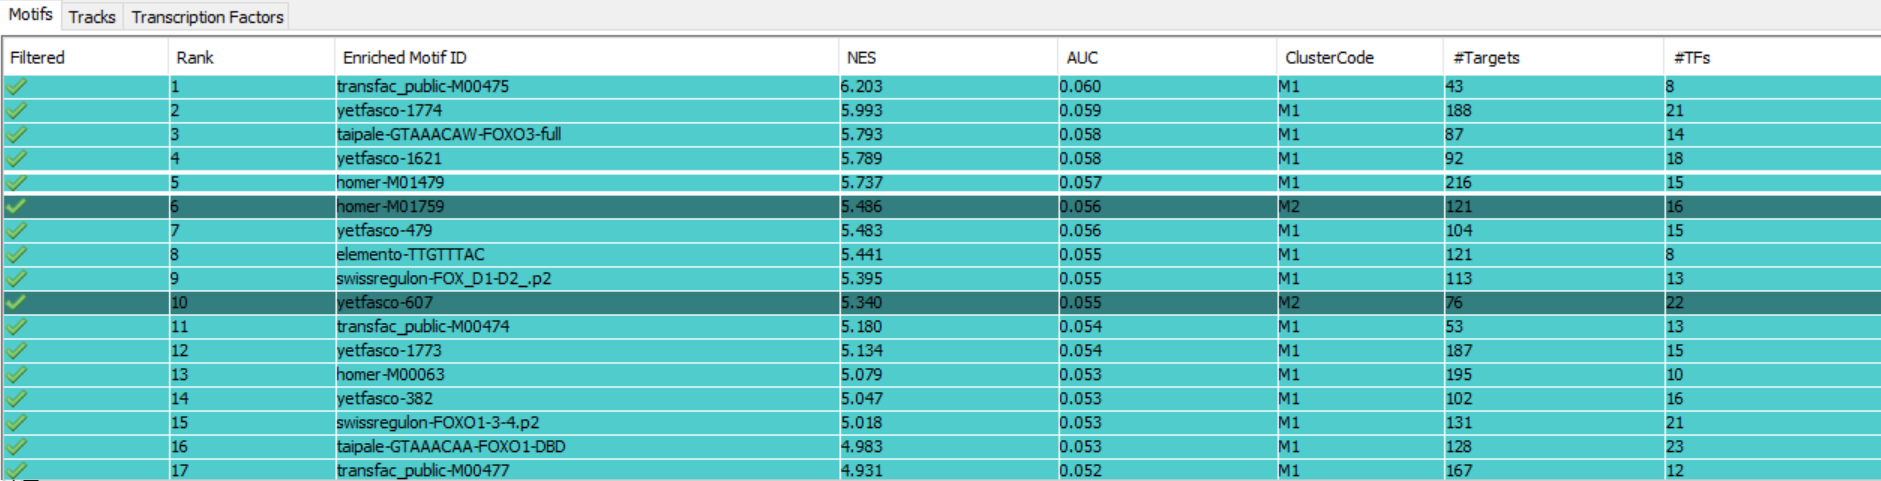

From that, we can predict the Transcription Factors (TF) and the genes they interact with, based on the motif of that TF being enriched near these genes compared to the rest of the genome.

By looking at the targets of the ten most enriched motifs, we discover than the motif ranked in fifth position is present in the four upregulated control genes. Therefore, we find that the TF <b>FOXK1</b> has the four control genes as target genes (but not only!):

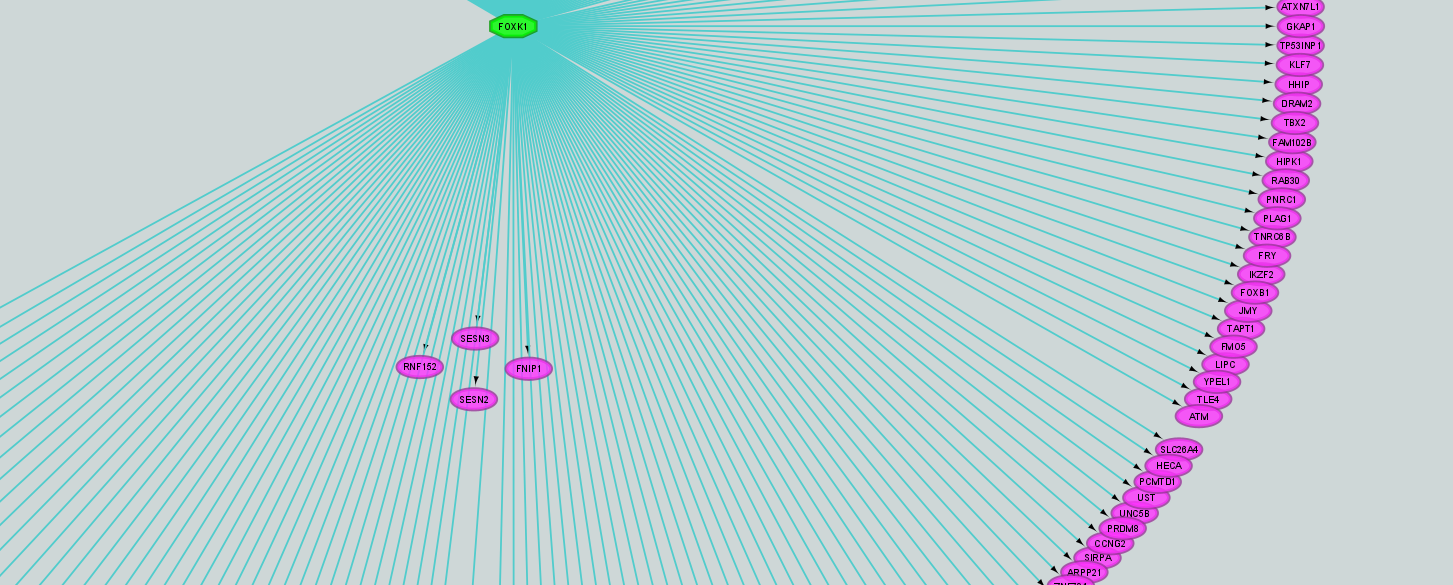

iRegulon enables us to retreive FOXK1 binding motif:

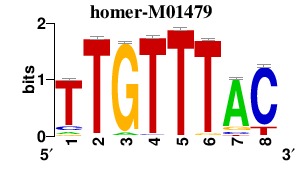

From a brief [online research](https://en.wikipedia.org/wiki/FOXK1), we learn that during starvation and during T cell proliferation, FOXK1 is one of the transcriptions factors inducing aerobic glycolysis to produce the building block to sustain growth. 

<i> " During starvation, in type 2 diabetes, in rapidly dividing cells during embryogenesis, in tumors (Warburg effect) and during T cell proliferation, aerobic glycolysis is induced to produce the building block to sustain growth. FOXK1 is one of the transcription factors managing the passage from the normal cellular respiration (complete glucose oxidation) to generating ATP and intermediaries for many other biochemical pathways.[7] ... Both in vitro and in vivo experiments, including studies of primary human cells, show how FOXK1 and/or FOXK2 are likely to act as important regulators that reprogram cellular metabolism to induce aerobic glycolysis.[7] " </i> 

This information is aligned with the initial research project. Indeed, <i>da Silva-Diz et al</i> showed that MB1-47 promotes increased glycolysis and glucose flux into TCA cycle. The TCA (or citric acide) cycle forms a key part of the aerobic respiration. 

We discovered in the previous part that MB1-47 may induce a negative effect on the survival of cells. Knowing that information, it makes sense that the cells trigger a survival mechanism i.e. aerobic respiration when cells are non conducive to survival such as during a period of starvation or during T cell proliferation. 

#### Conclusion

In conclusion, in this report we have studied and analysed a RNA-seq data set, run FASTQC quality test, undergone mapping, normalized and interpreted the results of differential expression using the DESeq package, and apply some functional analysis methods to find out the pathways that are enriched when subject to a treatment compared to control.

Overall, we obseved that MB1-47 treatment does induce a differential expression of genes. Among other things, MB1-47 treatment in T-ALL cells plays a role in the regulation of the mTOR/AMPK signaling cascade by inhibiting mTORc1 and inducing a negative effect of the survival of cells such as the upregulation of catabolic processes and apoptotic processes. We also noticed a potential implication of MB1-47 in the incorrect folding of protein by the ribosomes of the endoplasmic reticulum.  

Furthermore, the motif discovery showed evidence about a potential survival mechanism - aerobic respiration - triggered when cells are in a period of starvation or during T cell proliferation.